In [2838]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2839]:
df = pd.read_csv('Dfbattingsummary.csv')


In [2840]:
df = df.rename(columns={'Unnamed: 1':'Dismissal'})

In [2841]:
df = df.drop(['Unnamed: 0'],axis=1)

In [2842]:
# I would also like to see the batsman who got dimissed by the same bowler. lets work on the column Dismissal. Make a new column for the dismissal and also mode of dismissal

In [2843]:
filtered_df = df[df['Dismissal'].str.startswith(('r', 'run','retired'))]



In [2844]:
#filtered_df.head(2)

In [2845]:
def update_dismissal(row):
    if row['Dismissal'] == 'not out':
        return 'not out'
    elif row['Dismissal'].startswith('b'):
        return 'Bowled'
    elif row['Dismissal'].startswith('c'):
        return 'Caught'
    elif row['Dismissal'].startswith('lbw'):
        return 'lbw'
    elif row['Dismissal'].startswith('hit'):
        return 'Hitwicket'
    elif row['Dismissal'].startswith('retired hurt'):
        return 'Retired hurt'
    elif row['Dismissal'].startswith('st'):
        return 'Stumped'
    elif row['Dismissal'].startswith('c & b'):
        return 'Caught & Bowled'
    elif 'run out' in row['Dismissal']:
        return 'Run out'
    else:
        return row['Dismissal']

# Create new column 'Type_Dismissal' based on 'Dismissal' column values
df['Type_Dismissal'] = df.apply(update_dismissal, axis=1)

# Print the updated dataframe
#print(df)

In [2846]:
# I have created a new column for the mode of dismissal, Now just strip the bowler from the row Dismissal 


In [2847]:
df['bowler'] = df['Dismissal'].apply(lambda x: x.split(' b ', 1)[-1].strip() if ' b ' in x else x.split(' ', 1)[-1].strip())


In [2848]:
df['bowler'] = df.apply(lambda row: 'not out' if row['Dismissal'] == 'not out' else row['bowler'], axis=1)


In [2849]:
#filtered_df2 = df[df['bowler'].str.startswith(('out'))]


In [2850]:
df['bowler'] = df['bowler'].apply(lambda x: x.replace('out', ''))
df['bowler'] = df['bowler'].apply(lambda x: x.replace('/', '&'))

In [2851]:
df['bowler'] = df['bowler'].apply(lambda x: x.replace('not', ''))


In [2852]:
df = df.rename(columns={'R': 'Runs_Scored', 'B': 'Balls'})
df = df.drop('M', axis=1)



In [2853]:
df = df.rename(columns={'BATTING': 'Batsman', 'SR': 'StrikeRate'})


In [2854]:
df.loc[df['Type_Dismissal'] == 'not out', 'bowler'] = 'not out'

In [2855]:
desired_rows = df[df['Team'] == 'Sunrisers']


In [2856]:
batsman_filter = st.selectbox('Select a batsman', df['Batsman'].unique())
team_filter = st.selectbox('Select a team', df['Team'].unique())
Match_filter = st.selectbox('Select a Match', df['Match'].unique())
Bowler_filter = st.selectbox('Select a bowler', df['bowler'].unique())
Team_filter = st.selectbox('Select a Team', df['Team'].unique())


In [2857]:
filtered_df = df[(df['Batsman'] == batsman_filter) &
                 (df['Team'] == team_filter) &
                 (df['Match'] == Match_filter) &
                 (df['bowler'] == Bowler_filter) &
                 (df['Team'] == Team_filter)]


# TOP 5 Batsman

In [2858]:
df_sorted = df.sort_values('Runs_Scored', ascending=False)


In [2859]:
runs_by_batsman = df.groupby('Batsman')['Runs_Scored'].sum().reset_index()
runs_by_batsman = runs_by_batsman.sort_values('Runs_Scored', ascending=False)


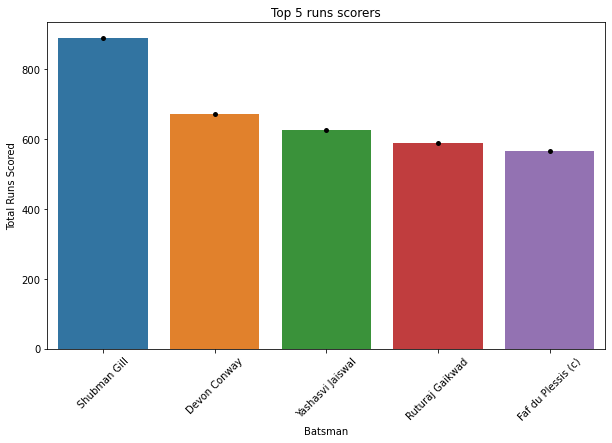

In [2956]:
plt.figure(figsize=(10, 6))
sns.barplot(data=runs_by_batsman.head(5), x='Batsman', y='Runs_Scored', ci=None)
sns.swarmplot(data=runs_by_batsman.head(5), x='Batsman', y='Runs_Scored', color='black')
plt.xlabel('Batsman')
plt.ylabel('Total Runs Scored')
plt.title('Top 5 runs scorers')
plt.xticks(rotation=45)
plt.show()

In [2861]:
Most_sixes_by_batsman = df.groupby('Batsman')['6s'].sum().reset_index().sort_values('6s', ascending=False)[:10]
Most_boundries_by_batsman = df.groupby('Batsman')['4s'].sum().reset_index().sort_values('4s', ascending=False)[:10]

In [2862]:
Most_sixes_by_batsman.columns

Index(['Batsman', '6s'], dtype='object')

# Most 6's in ipl 2023

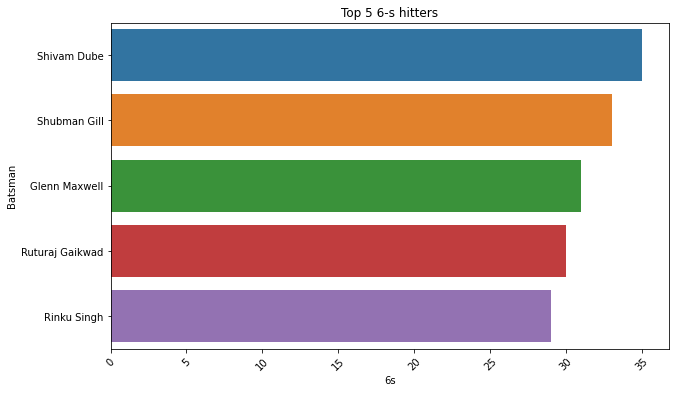

In [2962]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Most_sixes_by_batsman.head(5), y='Batsman', x='6s', orient='h')
plt.xlabel('6s')
plt.ylabel('Batsman')
plt.title('Top 5 6-s hitters')
plt.xticks(rotation=45)
plt.show()


# Most Boundaries's in ipl 2023

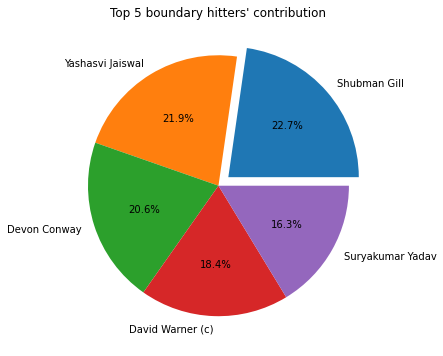

In [2964]:
plt.figure(figsize=(10, 6))
plt.pie(Most_boundries_by_batsman['4s'].head(5), labels=Most_boundries_by_batsman['Batsman'].head(5), autopct='%1.1f%%', explode=[0.1, 0, 0, 0, 0])
plt.title("Top 5 boundary hitters' contribution")
plt.show()


In [2868]:
Balls_played_runs_scored = df.groupby('Batsman')[['Balls', 'Runs_Scored']].sum().reset_index().sort_values('Balls', ascending=False)

In [2870]:
Balls_played_runs_scored['StrikeRate'] = (Balls_played_runs_scored['Runs_Scored'] / Balls_played_runs_scored['Balls']) * 100


In [2871]:
Balls_played_runs_scored = Balls_played_runs_scored[Balls_played_runs_scored['Balls'] > 140] #the condition for this batsman should have played atleast 100 balls in the totals series. 

In [2872]:
Batsman_topstrikerate = Balls_played_runs_scored[['Batsman', 'StrikeRate']].copy()


In [2873]:
Batsman_topstrikerate.sort_values('StrikeRate', ascending=False, inplace=True)


In [2874]:
Batsman_topstrikerate = Batsman_topstrikerate[:10]

In [2875]:
Batsman_topstrikerate.reset_index(inplace=True)

In [2876]:
#Batsman_topstrikerate

In [2877]:
Batsman_topstrikerate.drop(['index'],axis=1,inplace=True)

In [2966]:
Batsman_topstrikerate

,Batsman,StrikeRate
0,Glenn Maxwell,183.486239
1,Suryakumar Yadav,181.877023
2,Heinrich Klaasen †,177.075099
3,Ajinkya Rahane,172.486772
4,Tilak Varma,164.114833
5,Yashasvi Jaiswal,163.612565
6,Nicholas Pooran †,163.333333
7,Liam Livingstone,163.157895
8,Cameron Green,160.283688
9,Vijay Shankar,160.106383


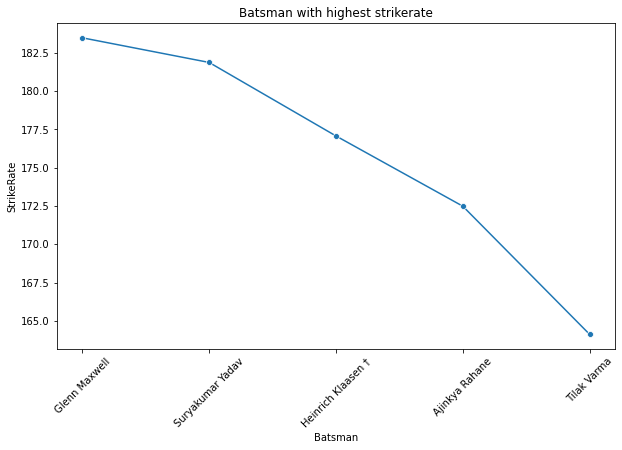

In [2969]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Batsman_topstrikerate.head(5), x='Batsman', y='StrikeRate', marker='o')
plt.xlabel('Batsman')
plt.ylabel('StrikeRate')
plt.title('Batsman with highest strikerate')
plt.xticks(rotation=45)
plt.show()


In [2880]:
bowler_counts = df['bowler'].value_counts().reset_index()[1:]


In [2881]:
desired_rows = df[df['bowler'] == 'Sharma']


In [2882]:
desired_rows.shape

(47, 11)

In [2883]:
desired_rows.loc[(desired_rows['Match'] == 'Punjab Kings Vs Titans') & (desired_rows['Team'] == 'Punjab Kings'), 'bowler'] = 'mohitsharma'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [2884]:
desired_rows.loc[(desired_rows['Match'] == 'Capitals Vs KKR') & (desired_rows['Team'] == 'Kolkata Knight Riders'), 'bowler'] = 'Ishantsharma'


In [2885]:
desired_rows.loc[(desired_rows['Match'] == 'RCB Vs Mumbai') & (desired_rows['Team'] == 'Mumbai Indians'), 'bowler'] = 'KV Sharma'


In [2886]:
desired_rows.loc[(desired_rows['Match'] == 'KKR Vs RCB') & (desired_rows['Team'] == 'Kolkata Knight Riders'), 'bowler'] = 'KV Sharma'


In [2887]:
desired_rows.loc[(desired_rows['Match'] == 'Capitals Vs Sunrisers') & (desired_rows['Team'] == 'Sunrisers Hyderabad'), 'bowler'] = 'Ishantsharma'


In [2888]:
desired_rows.loc[(desired_rows['Match'] == 'Titans Vs Capitals') & (desired_rows['Team'] == 'Titans'), 'bowler'] = 'Ishantsharma'


In [2889]:
desired_rows.loc[((desired_rows['Match'] == 'Titans Vs Mumbai') | (desired_rows['Match'] == 'Titans Vs Super Kings') | (desired_rows['Match'] == 'Titans Vs Capitals') | (desired_rows['Match'] == 'Mumbai Vs Titans') | (desired_rows['Match'] == 'Super Kings Vs Titans')) & ((desired_rows['Team'] == 'Mumbai') | (desired_rows['Team'] == 'Super kings') | (desired_rows['Team'] == 'Delhi Capitals') | (desired_rows['Team'] == 'Mumbai Indians') | (desired_rows['Team'] == 'Chennai Super Kings')), 'bowler'] = 'mohitsharma'


In [2890]:
desired_rows.loc[((desired_rows['Match'] == 'Capitals Vs Punjab Kings') & (desired_rows['Team'] == 'Punjab Kings')) | ((desired_rows['Match'] == 'Sunrisers Vs Capitals') & (desired_rows['Team'] == 'Sunrisers')) | ((desired_rows['Match'] == 'Punjab Kings Vs Capitals') & (desired_rows['Team'] == 'Punjab Kings')), 'bowler'] = 'Ishantsharma'



In [2891]:
desired_rows.loc[((desired_rows['Match'] == 'RCB Vs Super Giants') | (desired_rows['Match'] == 'Super Giants Vs RCB') | (desired_rows['Match'] == 'Super Giants Vs Titans')) & (desired_rows['Team'] == 'Super Giants'), 'bowler'] = 'KV Sharma'



In [2892]:
desired_rows.loc[((desired_rows['Match'] == 'Titans Vs Mumbai') | (desired_rows['Match'] == 'Titans Vs Super Kings') | (desired_rows['Match'] == 'Titans Vs Capitals') | (desired_rows['Match'] == 'Mumbai Vs Titans') | (desired_rows['Match'] == 'Super Kings Vs Titans') | (desired_rows['Match'] == 'Super Giants Vs RCB') | (desired_rows['Match'] == 'Super Giants Vs Titans') | (desired_rows['Match'] == 'Titans Vs Super Giants') | (desired_rows['Match'] == 'Titans Vs Sunrisers')) & ((desired_rows['Team'] == 'Mumbai') | (desired_rows['Team'] == 'Super kings') | (desired_rows['Team'] == 'Delhi Capitals') | (desired_rows['Team'] == 'Mumbai Indians') | (desired_rows['Team'] == 'Chennai Super Kings') | (desired_rows['Team'] == 'Super Giants') | (desired_rows['Team'] == 'Sunrisers')), 'bowler'] = 'mohitsharma'
desired_rows.loc[((desired_rows['Match'] == 'RCB Vs Super Giants') | (desired_rows['Match'] == 'Super Giants Vs RCB') | (desired_rows['Match'] == 'Super Giants Vs Titans') | (desired_rows['Match'] == 'Titans Vs Super Giants') | (desired_rows['Match'] == 'Titans Vs Sunrisers')) & (desired_rows['Team'] == 'Super Giants'), 'bowler'] = 'mohitsharma'
desired_rows.loc[((desired_rows['Match'] == 'Titans Vs Super Kings') & (desired_rows['Team'] == 'Super Kings')), 'bowler'] = 'mohitsharma'


In [2893]:
desired_rows.loc[((desired_rows['Match'] == 'RCB Vs Super Giants') | (desired_rows['Match'] == 'Super Giants Vs RCB') | (desired_rows['Match'] == 'Capitals Vs RCB') | (desired_rows['Match'] == 'Royals Vs RCB')) & ((desired_rows['Team'] == 'Super Giants') | (desired_rows['Team'] == 'Capitals') | (desired_rows['Team'] == 'Royals')), 'bowler'] = 'KV Sharma'



In [2894]:
Wickets = desired_rows['bowler'].value_counts()


In [2895]:
df_wickets = pd.DataFrame(Wickets)


In [2896]:
df_wickets = df_wickets.reset_index()

In [2897]:
df_wickets = df_wickets.rename(columns={'index':'bowler','bowler':'wickets'})

In [2898]:

bowler_counts = bowler_counts.rename(columns={'index':'bowler','bowler':'wickets'})

In [2899]:
concatenated_df = pd.concat([df_wickets, bowler_counts])


In [2900]:
concatenated_df_sorted = concatenated_df.sort_values(by='wickets', ascending=False)


In [2901]:
concatenated_df_sorted = concatenated_df_sorted.drop(1)


In [2902]:
concatenated_df_sorted = concatenated_df_sorted.reset_index()

In [2903]:
concatenated_df_sorted = concatenated_df_sorted.drop(['index'],axis=1)

In [2904]:
#concatenated_df_sorted

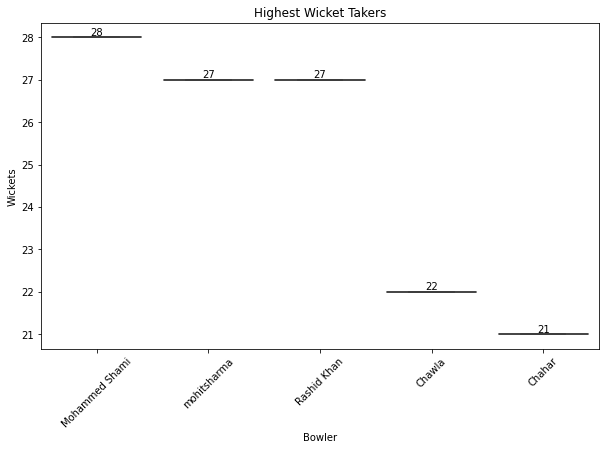

In [2978]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=concatenated_df_sorted.head(5), x='bowler', y='wickets')
# Add data labels
for i in range(concatenated_df_sorted.head(5).shape[0]):
    plt.text(i, concatenated_df_sorted.head(5)['wickets'].iloc[i], 
             concatenated_df_sorted.head(5)['wickets'].iloc[i], 
             ha='center', va='bottom')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.title('Highest Wicket Takers')
plt.xticks(rotation=45)
plt.show()


In [2909]:
df

,Match,Team,Batsman,Dismissal,Runs_Scored,Balls,4s,6s,StrikeRate,Type_Dismissal,bowler
0,Titans Vs Super Kings,Chennai Super Kings,Devon Conway,b Mohammed Shami,1,6,0,0,16.66,Bowled,Mohammed Shami
1,Titans Vs Super Kings,Chennai Super Kings,Ruturaj Gaikwad,c Shubman Gill b Joseph,92,50,4,9,184.00,Caught,Joseph
2,Titans Vs Super Kings,Chennai Super Kings,Moeen Ali,c †Saha b Rashid Khan,23,17,4,1,135.29,Caught,Rashid Khan
3,Titans Vs Super Kings,Chennai Super Kings,Ben Stokes,c †Saha b Rashid Khan,7,6,1,0,116.66,Caught,Rashid Khan
4,Titans Vs Super Kings,Chennai Super Kings,Ambati Rayudu,b Little,12,12,0,1,100.00,Bowled,Little
...,...,...,...,...,...,...,...,...,...,...,...
1176,Titans Vs Super Kings,Super Kings,Shivam Dube,not out,32,21,0,2,152.38,not out,not out
1177,Titans Vs Super Kings,Super Kings,Ajinkya Rahane,c Shankar b Sharma,27,13,2,2,207.69,Caught,Sharma
1178,Titans Vs Super Kings,Super Kings,Ambati Rayudu,c & b Sharma,19,8,1,2,237.50,Caught,Sharma
1179,Titans Vs Super Kings,Super Kings,MS Dhoni (c)†,c Miller b Sharma,0,1,0,0,0.00,Caught,Sharma


In [2928]:
filtered_df = df[df['Type_Dismissal'] == "Bowled"]


In [2929]:
filtered_df

,Match,Team,Batsman,Dismissal,Runs_Scored,Balls,4s,6s,StrikeRate,Type_Dismissal,bowler
0,Titans Vs Super Kings,Chennai Super Kings,Devon Conway,b Mohammed Shami,1,6,0,0,16.66,Bowled,Mohammed Shami
4,Titans Vs Super Kings,Chennai Super Kings,Ambati Rayudu,b Little,12,12,0,1,100.00,Bowled,Little
10,Punjab Kings Vs KKR,Punjab Kings,Shikhar Dhawan (c),b Varun,40,29,6,0,137.93,Bowled,Varun
17,Super Giants Vs Capitals,Lucknow Super Giants,Kyle Mayers,b Patel,73,38,2,7,192.10,Bowled,Patel
25,Sunrisers Vs Royals,Rajasthan Royals,Jos Buttler,b Fazalhaq Farooqi,54,22,7,3,245.45,Bowled,Fazalhaq Farooqi
...,...,...,...,...,...,...,...,...,...,...,...
1156,Super Giants Vs Mumbai,Super Giants,Ayush Badoni,b Madhwal,1,7,0,0,14.28,Bowled,Madhwal
1162,Super Giants Vs Mumbai,Super Giants,Mohsin Khan,b Madhwal,0,7,0,0,0.00,Bowled,Madhwal
1165,Titans Vs Mumbai,Mumbai,Cameron Green,b Little,30,20,2,2,150.00,Bowled,Little
1166,Titans Vs Mumbai,Mumbai,Suryakumar Yadav,b Sharma,61,38,7,2,160.52,Bowled,Sharma


In [2930]:
Bowled_counts = filtered_df.groupby(['bowler', 'Type_Dismissal']).size().reset_index(name='Bowled_counts').sort_values('Bowled_counts', ascending=False)


In [2931]:
Bowled_counts[:15]

,bowler,Type_Dismissal,Bowled_counts
39,Rashid Khan,Bowled,8
50,Varun,Bowled,7
44,Sharma,Bowled,6
35,Patel,Bowled,6
26,Mohammed Siraj,Bowled,5
16,Jadeja,Bowled,5
25,Mohammed Shami,Bowled,5
22,Madhwal,Bowled,5
9,Chawla,Bowled,5
47,Theekshana,Bowled,4
